# DETECCIÓN DE BORDES

## PREPROCESAMIENTO

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('STITCH.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

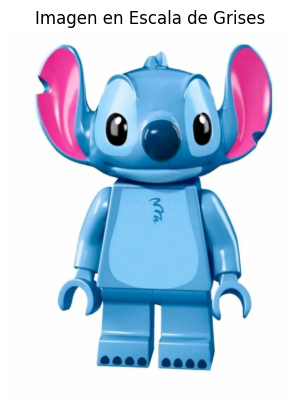

In [11]:
# Mostrar la imagen en escala de grises
plt.imshow(image_rgb)  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

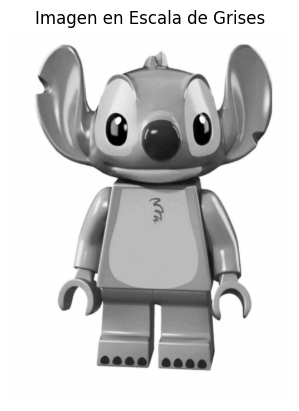

In [12]:
# Mostrar la imagen en escala de grises
plt.imshow(gray, cmap='gray')  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

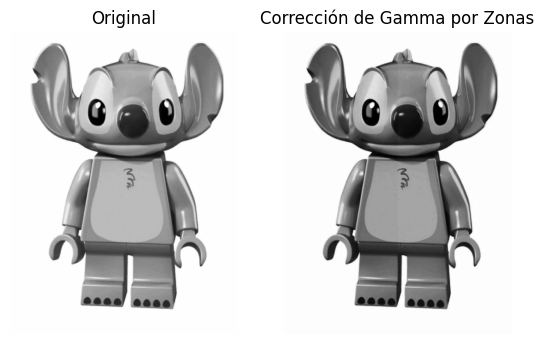

In [13]:
def ajuste_gamma(imagen, gamma=1.0):
    tabla = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(imagen, tabla)

# Dividir la imagen en dos partes (izquierda y derecha)
h, w = gray.shape
mitad = w // 2
izquierda = gray[:, :mitad]
derecha = gray[:, mitad:]

# Aplicar diferentes ajustes de gamma
izquierda_corrigida = ajuste_gamma(izquierda, gamma=1.5)  # Aclara la parte oscura
derecha_corrigida = ajuste_gamma(derecha, gamma=1.4)  # Oscurece la parte brillante

# Unir ambas partes
imagen_balanceada = np.hstack((izquierda_corrigida, derecha_corrigida))

# Mostrar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Corrección de Gamma por Zonas")
plt.imshow(imagen_balanceada, cmap='gray')
plt.axis('off')

plt.show()

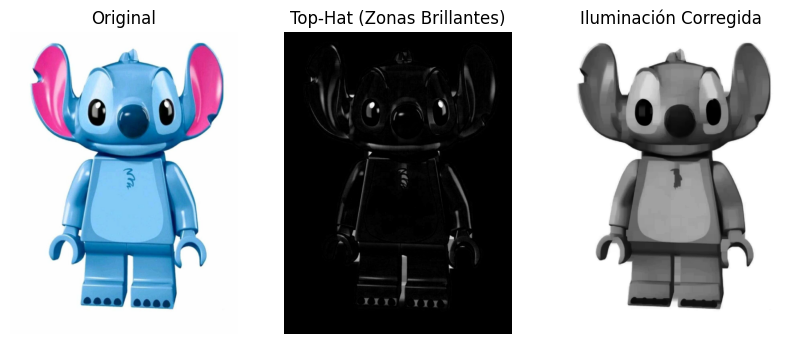

In [14]:
# Crear un kernel grande para detectar áreas brillantes
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (29, 29))

# Aplicar filtro "Top-Hat" (realza áreas más brillantes)
top_hat = cv2.morphologyEx(imagen_balanceada, cv2.MORPH_TOPHAT, kernel)

# Restar el top-hat de la imagen original para compensar la iluminación
imagen_corrigida = cv2.subtract(imagen_balanceada, top_hat)

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_rgb, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Top-Hat (Zonas Brillantes)")
plt.imshow(top_hat, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Iluminación Corregida")
plt.imshow(imagen_corrigida, cmap='gray')
plt.axis('off')

plt.show()

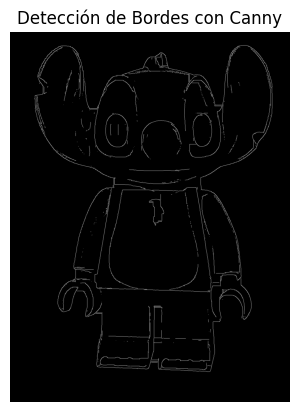

In [15]:
# Aplicar detección de bordes con Canny
bordes_canny = cv2.Canny(imagen_corrigida, 71, 71) 
#bordes_canny = cv2.Canny(prewitt_result, 110, 20) 
# Mostrar resultado
plt.imshow(bordes_canny, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [16]:
kernel = np.ones((1,1), np.uint8)
bordes_dilatados = cv2.dilate(bordes_canny, kernel, iterations=1000)

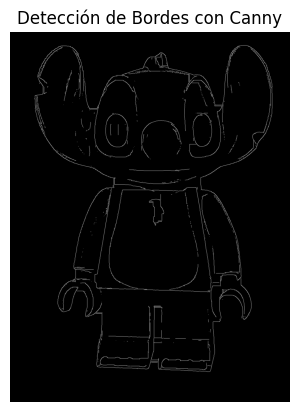

In [17]:
# Mostrar resultado
plt.imshow(bordes_dilatados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [18]:
kernel = np.ones((1,1), np.uint8)
bordes_erosionados = cv2.erode(bordes_dilatados, kernel, iterations=5000)

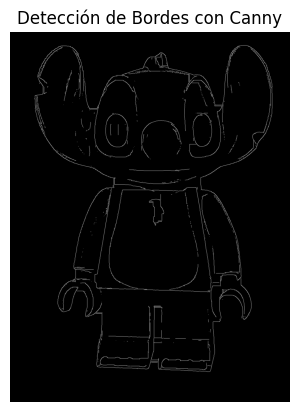

In [19]:
# Mostrar resultado
plt.imshow(bordes_erosionados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [20]:
kernel = np.ones((3,3), np.uint8)
bordes_dilatados = cv2.dilate(bordes_erosionados, kernel, iterations=10)

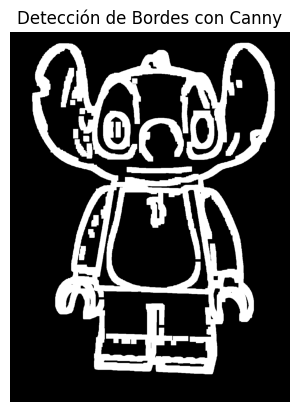

In [21]:

# Mostrar resultado
plt.imshow(bordes_dilatados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [22]:
# 3. Realizar operación de cierre para conectar bordes
kernel = np.ones((5,5), np.uint8)
bordes_cerrados = cv2.morphologyEx(bordes_dilatados , cv2.MORPH_CLOSE, kernel)

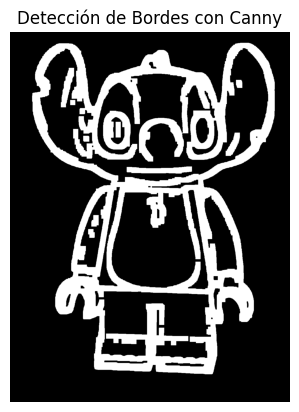

In [23]:
# Mostrar resultado
plt.imshow(bordes_cerrados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [24]:
kernel = np.ones((3,3), np.uint8)
bordes_erosionados = cv2.erode(bordes_cerrados, kernel, iterations=10)

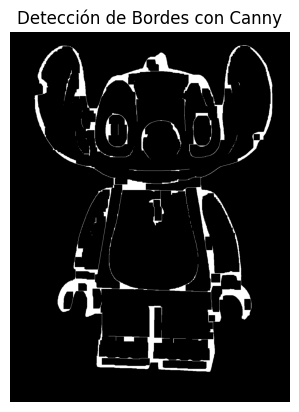

In [25]:
# Mostrar resultado
plt.imshow(bordes_erosionados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

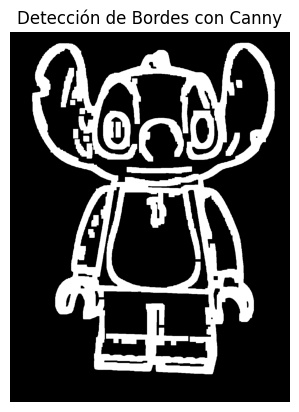

In [26]:
kernel = np.ones((5,5), np.uint8)
bordes_dilatados = cv2.dilate(bordes_erosionados, kernel, iterations=5)
# Mostrar resultado
plt.imshow(bordes_dilatados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

## BORDES OBTENIDOS

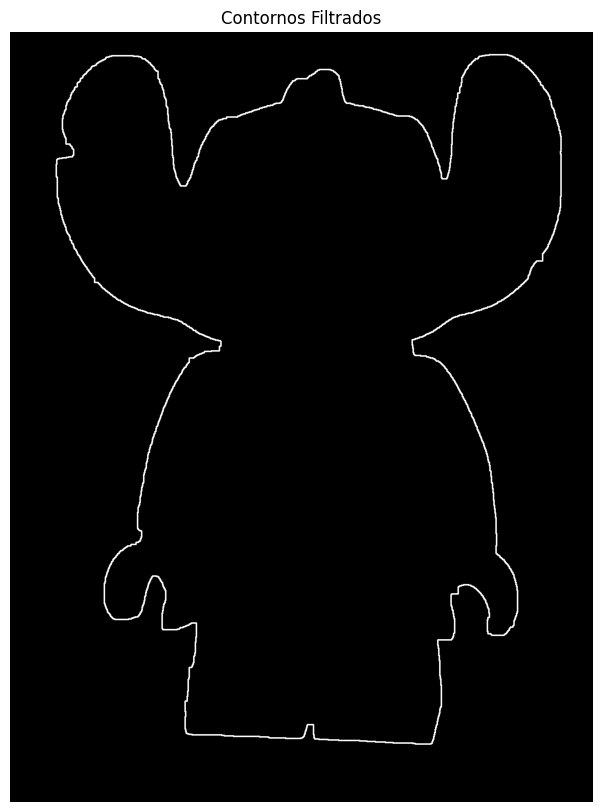

In [27]:
kernel = np.ones((5,5), np.uint8)

# 4. Encontrar contornos
contornos, jerarquia = cv2.findContours(bordes_dilatados, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Filtrar contornos (ajusta el valor 10000 según el tamaño de tu imagen)
contornos_filtrados = [cnt for cnt in contornos if cv2.contourArea(cnt) > 20]  # Reducí el umbral

# 6. Crear imagen en blanco para dibujar
imagen_contornos = np.zeros_like(gray)

# 7. Dibujar contornos
cv2.drawContours(imagen_contornos, contornos_filtrados, -1, (255), 2)  # Reduje el thickness

# 8. Mostrar resultado
plt.figure(figsize=(10,10))
plt.imshow(imagen_contornos, cmap='gray')
plt.title("Contornos Filtrados")
plt.axis('off')
plt.show()

In [28]:
imagen_bordes_superpuesta = cv2.addWeighted(image_rgb, 0.5, cv2.cvtColor(bordes_cerrados, cv2.COLOR_GRAY2BGR), 0.7, 5)

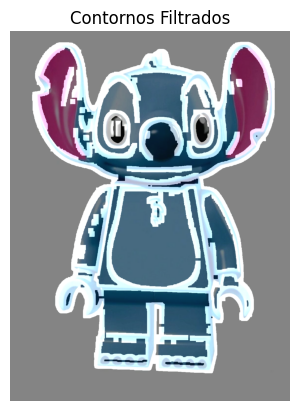

In [29]:
# Mostrar resultado
plt.imshow(imagen_bordes_superpuesta, cmap='gray')
plt.title("Contornos Filtrados")
plt.axis('off')
plt.show()

# DETECCIÓN DE ESQUINAS

### CON BORDES

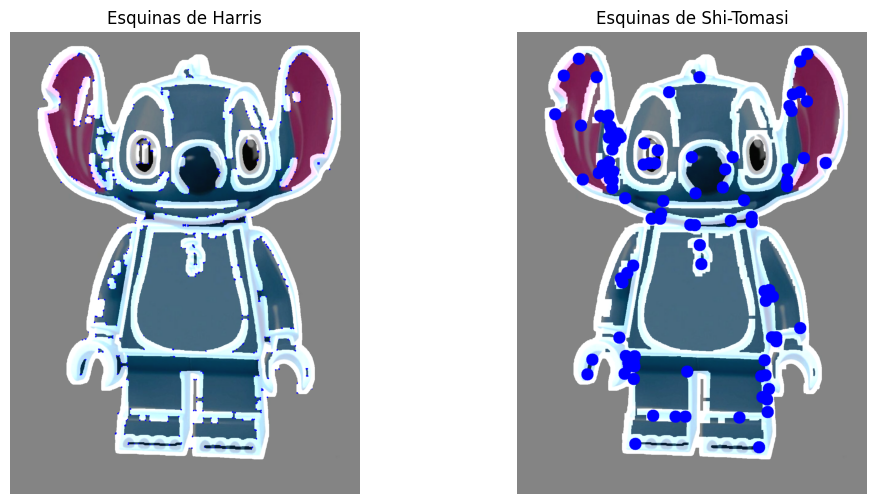

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de que image_rgb y bordes_cerrados estén cargadas correctamente
# image_rgb: imagen en formato RGB (puedes usar cv2.imread() para cargar la imagen)
# bordes_cerrados: imagen de bordes cerrados en escala de grises

# Asumimos que ya tienes las imágenes cargadas en image_rgb y bordes_cerrados

# Crear imagen combinada usando cv2.addWeighted
imagen_bordes_superpuesta = cv2.addWeighted(image_rgb, 0.5, cv2.cvtColor(bordes_cerrados, cv2.COLOR_GRAY2BGR), 0.7, 5)

# Convertir imagen a escala de grises
img_gray = cv2.cvtColor(imagen_bordes_superpuesta, cv2.COLOR_BGR2GRAY)

# 1. Preprocesamiento: Reducción de ruido (Filtro Gaussiano)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

# 2. Detección de esquinas utilizando el detector de Harris
dst_harris = cv2.cornerHarris(img_blur, 2, 3, 0.04)

# Umbralización para resaltar las esquinas
dst_harris = cv2.dilate(dst_harris, None)
img_harris = imagen_bordes_superpuesta.copy()
img_harris[dst_harris > 0.01 * dst_harris.max()] = [0, 0, 255]  # Color rojo para las esquinas

# 3. Detección de esquinas utilizando el detector Shi-Tomasi
corners_shi = cv2.goodFeaturesToTrack(img_blur, 100, 0.01, 10)
corners_shi = np.int32(corners_shi)  # Cambié np.int0 a np.int32

# 4. Mostrar resultados
plt.figure(figsize=(12, 6))

# Mostrar Harris
plt.subplot(1, 2, 1)
plt.imshow(img_harris)
plt.title('Esquinas de Harris')
plt.axis('off')

# Mostrar Shi-Tomasi
img_shi = imagen_bordes_superpuesta.copy()
for corner in corners_shi:
    x, y = corner.ravel()
    cv2.circle(img_shi, (x, y), 20, (0, 0, 255), -1)

plt.subplot(1, 2, 2)
plt.imshow(img_shi)
plt.title('Esquinas de Shi-Tomasi')
plt.axis('off')

plt.show()


### SIN BORDES

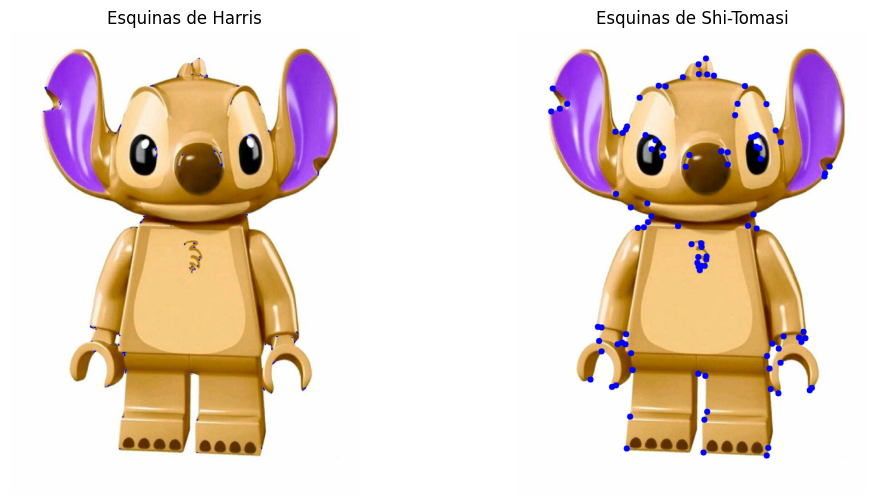

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen desde tu directorio (reemplaza 'ruta/a/tu/imagen.jpg' por la ubicación de tu imagen)
image_path = 'STITCH.jpg' # Cambia esta ruta
image_rgb = cv2.imread(image_path)



# Verifica si la imagen se cargó correctamente
if image_rgb is None:
    print("Error al cargar la imagen. Verifica la ruta.")
else:
    # Convertir la imagen cargada a escala de grises
    img_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # 1. Preprocesamiento: Reducción de ruido (Filtro Gaussiano)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # 2. Detección de esquinas utilizando el detector de Harris
    dst_harris = cv2.cornerHarris(img_blur, 2, 3, 0.04)

    # Umbralización para resaltar las esquinas
    dst_harris = cv2.dilate(dst_harris, None)
    img_harris = image_rgb.copy()
    img_harris[dst_harris > 0.01 * dst_harris.max()] = [0, 0, 255]  # Color rojo para las esquinas

    # 3. Detección de esquinas utilizando el detector Shi-Tomasi
    corners_shi = cv2.goodFeaturesToTrack(img_blur, 100, 0.01, 10)
    corners_shi = np.int32(corners_shi)  # Cambié np.int0 a np.int32

    # 4. Mostrar resultados
    plt.figure(figsize=(12, 6))

    # Mostrar Harris
    plt.subplot(1, 2, 1)
    plt.imshow(img_harris)
    plt.title('Esquinas de Harris')
    plt.axis('off')

    # Mostrar Shi-Tomasi
    img_shi = image_rgb.copy()
    for corner in corners_shi:
        x, y = corner.ravel()
        cv2.circle(img_shi, (x, y), 10, (0, 0, 255), -1)

    plt.subplot(1, 2, 2)
    plt.imshow(img_shi)
    plt.title('Esquinas de Shi-Tomasi')
    plt.axis('off')

    plt.show()


# PUNTOS

### SIN BORDES

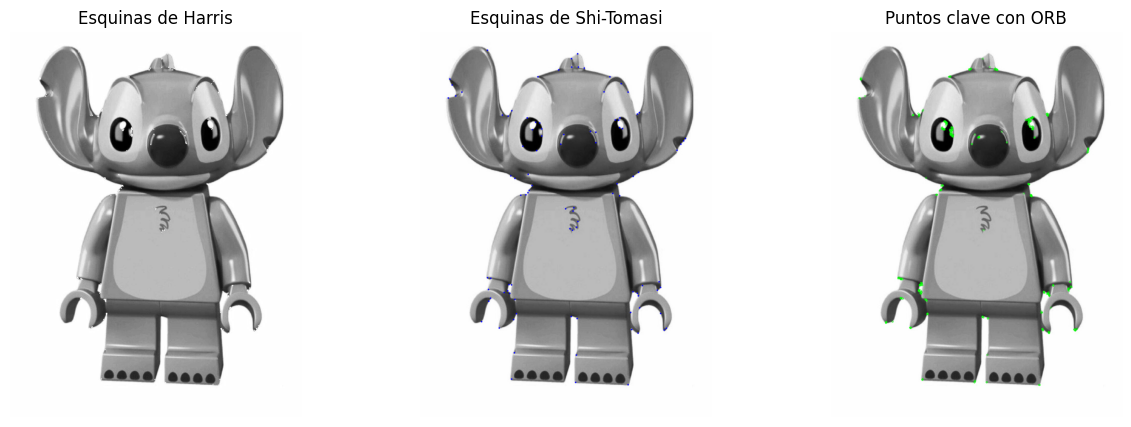

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
#img = cv2.imread('STITCH.jpg', cv2.IMREAD_GRAYSCALE)
imagen_bordes_superpuesta = cv2.addWeighted(image_rgb, 0.5, cv2.cvtColor(bordes_cerrados, cv2.COLOR_GRAY2BGR), 0.7, 5)

# 1. Detector de Harris
harris = cv2.cornerHarris(img, 2, 3, 0.04)
harris = cv2.dilate(harris, None)  # Expandir las esquinas para visualización
img_harris = img.copy()
img_harris[harris > 0.01 * harris.max()] = 255  # Marcar esquinas detectadas

# 2. Detector de Shi-Tomasi
corners = cv2.goodFeaturesToTrack(img, 100, 0.01, 10)
corners = np.intp(corners)
img_shi = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img_shi, (x, y), 3, (0, 0, 255), -1)  # Puntos en rojo

# 3. ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img, None)
img_orb = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_harris, cmap='gray')
plt.title("Esquinas de Harris")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_shi)
plt.title("Esquinas de Shi-Tomasi")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_orb)
plt.title("Puntos clave con ORB")
plt.axis("off")

plt.show()


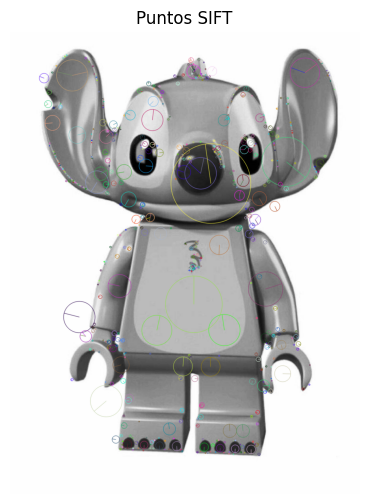

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('STITCH.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if img is None:
    raise ValueError("Error: No se pudo cargar la imagen. Verifica la ruta.")

# 1. SIFT (Scale-Invariant Feature Transform)
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(img, None)

# Guardar descriptores de SIFT
np.save('descriptores_sift.npy', descriptors_sift)

# Dibujar los puntos clave en la imagen
img_sift = cv2.drawKeypoints(img, keypoints_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Mostrar la imagen con matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_sift, cmap='gray')
plt.title('Puntos SIFT')
plt.axis('off')  # Ocultar ejes
plt.show()




In [ ]:
descriptores_sift = np.load('descriptores_sift.npy')
print(descriptores_sift.shape)


### CON BORDES

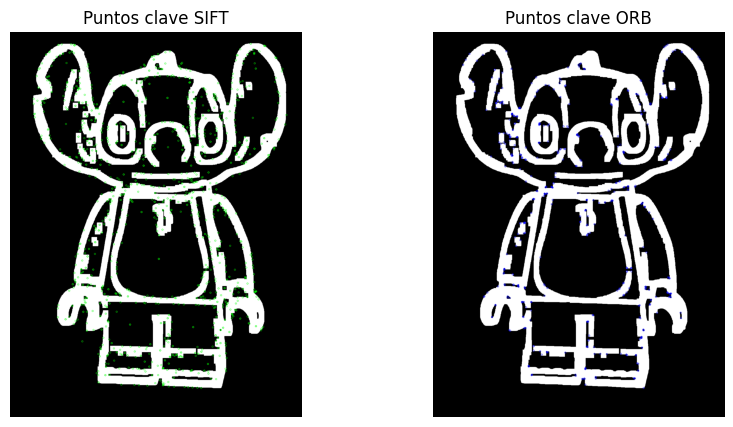

Número de puntos clave SIFT: 1329
Descriptores SIFT:
[[46.  2.  0. ...  0.  0.  0.]
 [17.  0.  0. ...  0.  0.  0.]
 [17.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 1.  0.  0. ...  0.  0.  2.]
 [ 2.  0.  0. ...  0.  0.  0.]]
Número de puntos clave ORB: 513
Descriptores ORB:
[[ 66  32  64 ... 136 114   1]
 [ 32  32  66 ...   8 113 128]
 [114  32  70 ...   8  67 128]
 ...
 [146 121 187 ... 112  39 250]
 [ 87 223 159 ... 114 161 125]
 [ 34 171 164 ... 222 213 207]]


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que ya tienes la imagen 'bordes_dilatados' generada
# Si no, puedes obtenerla usando el siguiente código:
kernel = np.ones((5,5), np.uint8)
bordes_dilatados = cv2.dilate(bordes_erosionados, kernel, iterations=5)

# 1. Obtener los puntos SIFT
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(bordes_dilatados, None)

# 2. Obtener los puntos ORB
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(bordes_dilatados, None)

# Dibujar los puntos clave SIFT
img_sift = cv2.drawKeypoints(bordes_dilatados, keypoints_sift, None, color=(0, 255, 0))

# Dibujar los puntos clave ORB
img_orb = cv2.drawKeypoints(bordes_dilatados, keypoints_orb, None, color=(0, 0, 255))

# Mostrar la imagen con puntos SIFT
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_sift, cmap='gray')
plt.title("Puntos clave SIFT")
plt.axis('off')

# Mostrar la imagen con puntos ORB
plt.subplot(1, 2, 2)
plt.imshow(img_orb, cmap='gray')
plt.title("Puntos clave ORB")
plt.axis('off')

plt.show()

# Imprimir el número de puntos clave y descriptores
print("Número de puntos clave SIFT:", len(keypoints_sift))
print("Descriptores SIFT:")
print(descriptors_sift)

print("Número de puntos clave ORB:", len(keypoints_orb))
print("Descriptores ORB:")
print(descriptors_orb)


In [33]:
import cv2
import numpy as np

# Cargar la imagen (reemplaza 'IM.webp' con el nombre de tu archivo)
image = cv2.imread('STITCH.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error al cargar la imagen.")
    exit()

# Inicializar el detector FAST
fast = cv2.FastFeatureDetector_create()

# Detectar puntos clave
keypoints_fast = fast.detect(image, None)

# Inicializar el descriptor BRIEF
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Extraer descriptores de las esquinas detectadas
keypoints_fast, descriptors_fast = brief.compute(image, keypoints_fast)

# Dibujar puntos clave
image_fast = cv2.drawKeypoints(image, keypoints_fast, None, color=(0, 255, 0))

# Mostrar imagen con puntos clave
cv2.imshow('Puntos clave FAST', image_fast)

# Esperar una tecla para cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()

# Imprimir descriptores
print("Número de puntos clave detectados:", len(keypoints_fast))
print("Descriptores de BRIEF:")
print(descriptors_fast)


Número de puntos clave detectados: 1821
Descriptores de BRIEF:
[[ 25   5  44 ... 124 192 253]
 [ 25   4 108 ... 124 192 255]
 [ 25   6  76 ... 124 192 255]
 ...
 [231 184 243 ... 135  51   8]
 [228 248  87 ... 162 243 192]
 [228 248  87 ... 168 247 196]]


# LINEAS

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('CALLE.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

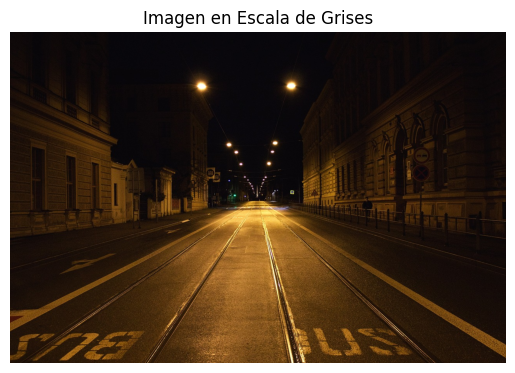

In [68]:
# Mostrar la imagen en escala de grises
plt.imshow(image_rgb)  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

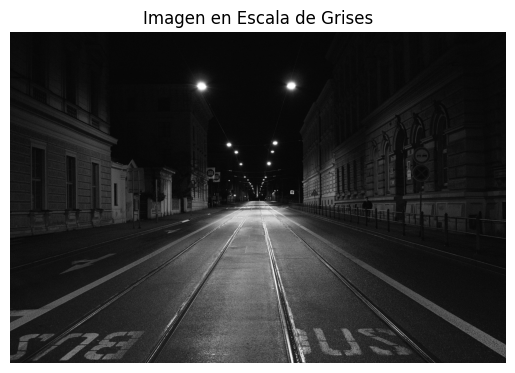

In [69]:
# Mostrar la imagen en escala de grises
plt.imshow(gray, cmap='gray')  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

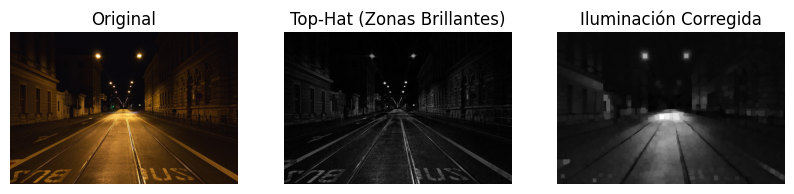

In [80]:

# Crear un kernel grande para detectar áreas brillantes
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 19))

# Aplicar filtro "Top-Hat" (realza áreas más brillantes)
top_hat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

# Restar el top-hat de la imagen original para compensar la iluminación
imagen_corrigida = cv2.subtract(gray, top_hat)

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_rgb, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Top-Hat (Zonas Brillantes)")
plt.imshow(top_hat, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Iluminación Corregida")
plt.imshow(imagen_corrigida, cmap='gray')
plt.axis('off')

plt.show()

In [166]:
difuminado = cv2.GaussianBlur(top_hat, (11,11), 0)

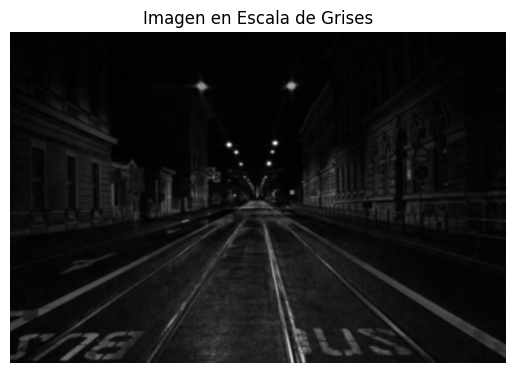

In [167]:
# Mostrar la imagen en escala de grises
plt.imshow(difuminado, cmap='gray')  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

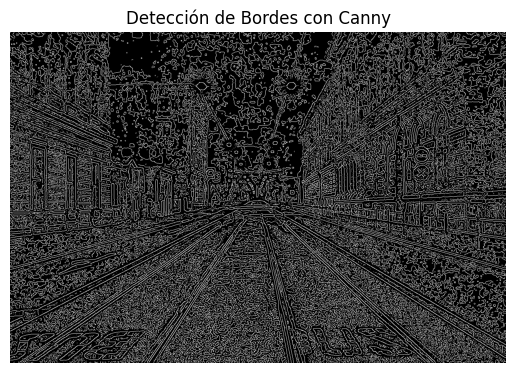

In [168]:
# Aplicar detección de bordes con Canny
bordes_canny = cv2.Canny(difuminado, 1, 1) 
#bordes_canny = cv2.Canny(prewitt_result, 110, 20) 
# Mostrar resultado
plt.imshow(bordes_canny, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(1279.5), np.float64(853.5), np.float64(-0.5))

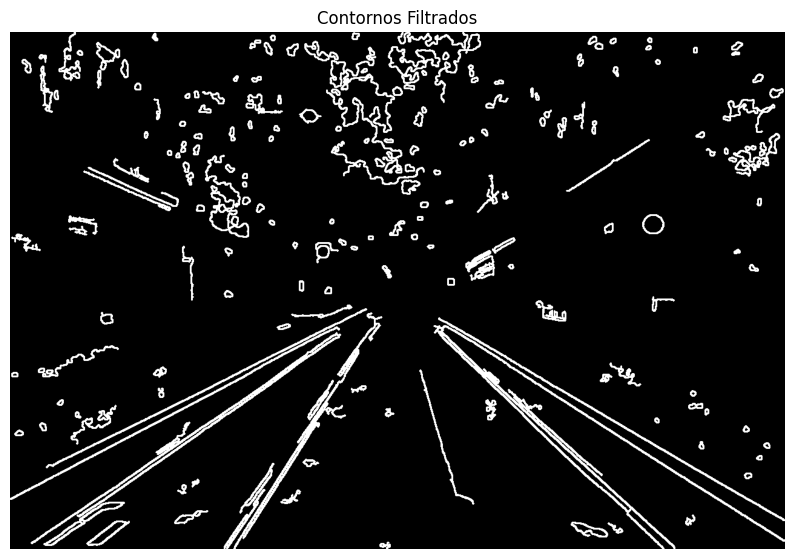

In [172]:
kernel = np.ones((5,5), np.uint8)
# 4. Encontrar contornos
contornos, jerarquia = cv2.findContours(bordes_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Filtrar contornos (ajusta el valor 10000 según el tamaño de tu imagen)
contornos_filtrados = [cnt for cnt in contornos if cv2.contourArea(cnt) > 30]  # Reducí el umbral

# 6. Crear imagen en blanco para dibujar
imagen_contornos = np.zeros_like(gray)

# 7. Dibujar contornos
cv2.drawContours(imagen_contornos, contornos_filtrados, -1, (255), 2)  # Reduje el thickness

# 8. Mostrar resultado
plt.figure(figsize=(10,10))
plt.imshow(imagen_contornos, cmap='gray')
plt.title("Contornos Filtrados")
plt.axis('off')

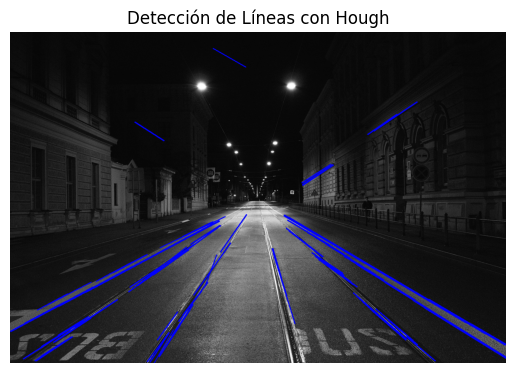

In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que ya tienes la imagen 'bordes_canny' obtenida:
# bordes_canny = cv2.Canny(difuminado, 1, 1)  # O cualquier otro bordes_canny ya generado

# 1. Aplicar la Transformada de Hough para detectar líneas
# Parámetros de Hough: imagen de bordes, resolución en píxeles, resolución angular (en radianes), umbral de votos mínimos
lines = cv2.HoughLinesP(imagen_contornos , 1, np.pi / 300, threshold=1, minLineLength=70, maxLineGap=7)

# 2. Dibujar las líneas detectadas en la imagen original (o en bordes_canny)
img_lines = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # Convertir a color para dibujar las líneas en colores
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Dibujar línea roja

# 3. Mostrar la imagen con las líneas detectadas
plt.imshow(img_lines)
plt.title("Detección de Líneas con Hough")
plt.axis('off')
plt.show()


Umbral (threshold): Este parámetro controla cuántos votos necesita un punto para ser considerado como parte de una línea. Aumentar este valor reducirá el número de líneas detectadas.
Longitud mínima de la línea (minLineLength): Este valor determina la longitud mínima que debe tener una línea para ser detectada. Las líneas más cortas se ignorarán.
Gap máximo (maxLineGap): Controla la distancia máxima entre dos segmentos de línea que se consideran una línea continua.